<a href="https://colab.research.google.com/github/abhinav-syl/Investing/blob/main/Investing_com_Scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import time
import requests

In [2]:
class scraper:
  def __init__(self):
    self.headers = {
      'Accept': '*/*',
      'Access-Control-Request-Method': 'GET',
      'Access-Control-Request-Headers': 'content-type',
      'Origin': 'https://www.investing.com',
      'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36',
      'Sec-Fetch-Mode': 'cors',
      }

  def get_soup(self, url):
    time.sleep(2)
    page = requests.get(url, headers=self.headers)
    time.sleep(5)
    soup = BeautifulSoup(page.content, 'html.parser')
    soup.prettify()
    return soup

In [3]:
investing = scraper().get_soup('https://www.investing.com/commodities/real-time-futures')

In [4]:
table = investing.find(attrs = {'id':'cross_rate_1'})
print(table)

<table class="genTbl closedTbl crossRatesTbl" id="cross_rate_1" tablesorter="">
<thead>
<tr>
<th class="flag"> </th>
<th class="left noWrap elp pointer" data-col-caption="Commodity" data-col-name="shortname">Commodity<span class="headerSortDefault" sort_default=""></span></th>
<th class="left pointer" data-col-caption="Month" data-col-name="future_leading_contract_exp_shortdate"> Month <span class="headerSortDefault" sort_default=""></span></th>
<th>Last</th>
<th>High</th>
<th>Low</th>
<th>Chg.</th>
<th class="pointer" data-col-caption="Chg. %" data-col-name="pair_change_percent">Chg. %<span class="headerSortDefault" sort_default=""></span></th>
<th class="pointer" data-col-caption="Time" data-col-name="shown_datetime">Time<span class="headerSortDefault" sort_default=""></span></th>
<th class="icon pointer"></th>
</tr>
</thead>
<tbody>
<tr>
<td class="flag"><span class="ceFlags gold" title=""> </span></td>
<td class="bold left plusIconTd noWrap elp"><a href="/commodities/gold" title="G

In [5]:
trs = table.findAll('tr')
print(trs)

[<tr>
<th class="flag"> </th>
<th class="left noWrap elp pointer" data-col-caption="Commodity" data-col-name="shortname">Commodity<span class="headerSortDefault" sort_default=""></span></th>
<th class="left pointer" data-col-caption="Month" data-col-name="future_leading_contract_exp_shortdate"> Month <span class="headerSortDefault" sort_default=""></span></th>
<th>Last</th>
<th>High</th>
<th>Low</th>
<th>Chg.</th>
<th class="pointer" data-col-caption="Chg. %" data-col-name="pair_change_percent">Chg. %<span class="headerSortDefault" sort_default=""></span></th>
<th class="pointer" data-col-caption="Time" data-col-name="shown_datetime">Time<span class="headerSortDefault" sort_default=""></span></th>
<th class="icon pointer"></th>
</tr>, <tr>
<td class="flag"><span class="ceFlags gold" title=""> </span></td>
<td class="bold left plusIconTd noWrap elp"><a href="/commodities/gold" title="Gold Futures">Gold</a><span class="alertBellGrayPlus js-plus-icon genToolTip oneliner" data-id="8830" da

In [6]:
dict_info = {}
for i in range(1,len(trs)):
  name = trs[i].find('a').text
  id = trs[i].find(attrs = {'class':'alertBellGrayPlus'})['data-id']
  #print(name,' - ',id)
  dict_info[name] = id

In [7]:
dict_info

{'Aluminium': '49768',
 'Brent Oil': '8833',
 'Copper': '959211',
 'Crude Oil WTI': '8849',
 'Feeder Cattle': '961618',
 'Gasoline RBOB': '954867',
 'Gold': '8830',
 'Heating Oil': '8988',
 'Lean Hogs': '8913',
 'Live Cattle': '8914',
 'London Coffee': '8911',
 'London Gas Oil': '8861',
 'Lumber': '959198',
 'Natural Gas': '8862',
 'Nickel': '959208',
 'Oats': '959199',
 'Orange Juice': '8891',
 'Palladium': '8883',
 'Platinum': '8910',
 'Rough Rice': '13916',
 'Silver': '8836',
 'US Cocoa': '8894',
 'US Coffee C': '8832',
 'US Corn': '8918',
 'US Cotton #2': '8851',
 'US Soybean Meal': '8919',
 'US Soybean Oil': '8915',
 'US Soybeans': '8916',
 'US Sugar #11': '8869',
 'US Wheat': '8917',
 'XAG/USD': '69',
 'XAU/USD': '68',
 'Zinc': '956470'}

In [8]:
import datetime

In [9]:
scraper().headers

{'Accept': '*/*',
 'Access-Control-Request-Headers': 'content-type',
 'Access-Control-Request-Method': 'GET',
 'Origin': 'https://www.investing.com',
 'Sec-Fetch-Mode': 'cors',
 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'}

In [30]:
temp = []
for i in dict_info:
  row = []
  print(i, ' - ', dict_info[i])
  row.append(i)
  row.append(dict_info[i])
  url = 'https://api.investing.com/api/financialdata/' + dict_info[i] + '/historical/chart/?period=MAX&interval=P1D&pointscount=120'
  print(url)
  content = requests.get(url, headers=scraper().headers)
  cont = content.json()['data']
  values = []
  for k in cont:
    dt = datetime.datetime.fromtimestamp(k[0] / 1000)
    dt = dt.strftime("%Y-%m-%dT%H:%M:%S%z")
    values.append([dt,k[1]])
  row.append(values)
  temp.append(row)
  if len(temp)>6:
    break
  

Gold  -  8830
https://api.investing.com/api/financialdata/8830/historical/chart/?period=MAX&interval=P1D&pointscount=120
XAU/USD  -  68
https://api.investing.com/api/financialdata/68/historical/chart/?period=MAX&interval=P1D&pointscount=120
Silver  -  8836
https://api.investing.com/api/financialdata/8836/historical/chart/?period=MAX&interval=P1D&pointscount=120
XAG/USD  -  69
https://api.investing.com/api/financialdata/69/historical/chart/?period=MAX&interval=P1D&pointscount=120
Copper  -  959211
https://api.investing.com/api/financialdata/959211/historical/chart/?period=MAX&interval=P1D&pointscount=120
Platinum  -  8910
https://api.investing.com/api/financialdata/8910/historical/chart/?period=MAX&interval=P1D&pointscount=120
Palladium  -  8883
https://api.investing.com/api/financialdata/8883/historical/chart/?period=MAX&interval=P1D&pointscount=120


In [35]:
seg = []
for name in temp:
  row = []
  row.append(name[0])
  row.append(name[1])
  for i in name[2]:
    t = row.copy()
    t.append(i[0])
    t.append(i[1])
    seg.append(t)

print(seg)

[['Gold', '8830', '2003-02-07T00:00:00', 370.5], ['Gold', '8830', '2003-02-10T00:00:00', 370.4], ['Gold', '8830', '2003-02-11T00:00:00', 363.2], ['Gold', '8830', '2003-02-12T00:00:00', 363.8], ['Gold', '8830', '2003-02-13T00:00:00', 352.4], ['Gold', '8830', '2003-02-14T00:00:00', 354.9], ['Gold', '8830', '2003-02-18T00:00:00', 347.8], ['Gold', '8830', '2003-02-19T00:00:00', 344], ['Gold', '8830', '2003-02-20T00:00:00', 351.7], ['Gold', '8830', '2003-02-21T00:00:00', 352.5], ['Gold', '8830', '2003-02-24T00:00:00', 353.9], ['Gold', '8830', '2003-02-25T00:00:00', 357.4], ['Gold', '8830', '2003-02-26T00:00:00', 353], ['Gold', '8830', '2003-02-27T00:00:00', 346.1], ['Gold', '8830', '2003-02-28T00:00:00', 350.2], ['Gold', '8830', '2003-03-03T00:00:00', 349.2], ['Gold', '8830', '2003-03-04T00:00:00', 353.2], ['Gold', '8830', '2003-03-05T00:00:00', 353.1], ['Gold', '8830', '2003-03-06T00:00:00', 356.8], ['Gold', '8830', '2003-03-07T00:00:00', 350.8], ['Gold', '8830', '2003-03-10T00:00:00', 354

In [36]:
import pandas as pd

In [37]:
df = pd.DataFrame(data = seg, columns = ['name','id','timestamp','value'])
df

,name,id,timestamp,value
0,Gold,8830,2003-02-07T00:00:00,370.50
1,Gold,8830,2003-02-10T00:00:00,370.40
2,Gold,8830,2003-02-11T00:00:00,363.20
3,Gold,8830,2003-02-12T00:00:00,363.80
4,Gold,8830,2003-02-13T00:00:00,352.40
...,...,...,...,...
31109,Palladium,8883,2022-07-07T00:00:00,1905.28
31110,Palladium,8883,2022-07-08T00:00:00,1985.00
31111,Palladium,8883,2022-07-10T00:00:00,2151.52
31112,Palladium,8883,2022-07-11T00:00:00,2174.02


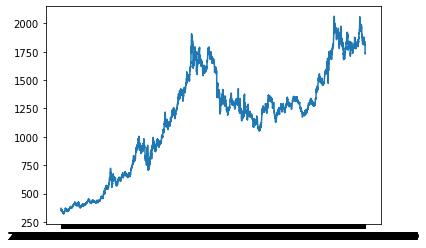

In [25]:
import matplotlib.pyplot as plt

plt.plot(df[df['name']=='Gold']['timestamp'], df[df['name']=='Gold']['value'])
plt.show()

In [38]:
import plotly.express as px

In [39]:
fig = px.line(df, x = "timestamp", y="value",
             color='name',
             #histfunc='avg',
             height=500)
fig.show()